## **CMoLL Project: ASD vs. TD Language Analysis (Random Forest Approach)**

Datasets:
The three datasets we used can be found under the following links and are all part of the TalkBank ASDBank data.

Eigsti corpus: https://asd.talkbank.org/access/English/Eigsti.html

Flusberg corpus: https://asd.talkbank.org/access/English/Flusberg.html

Nadig corpus: https://asd.talkbank.org/access/English/Nadig.html

In [ ]:
pip install shap

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import shap

In [ ]:
# import features as a csv

df = pd.read_csv('/content/drive/MyDrive/CMoLL project/data feature extraction.csv',
                 encoding='latin-1', sep=',')

pd.set_option('display.max_columns', None)


In [ ]:
df.head()

,ï»¿Dataset,ID,group type,echolalia (CHI),echolalia (CHI + CSR),Total number of different item types used,Total number of items (tokens),TTR (overall lexical diversity),CMOD,COMP,CSUBJ,XMOD,different grammatic Types (different types of grammatical constructions),different grammatic Token (specific grammatical constructions),TTR (syntactic complexity or specific grammatical structures),Matched strings,Number of utterances,Number of morphemes,MLU (ratio of morphemes over utterances),Standard deviation,Lemma-based TTR,MLU (ratio of tokens/utterance),Number of utterances (CHI),Number of turns (CHI),Number of words (CHI),MLT (Ratio of words over turns) (CHI),MLT (Ratio of utterances over turns) (CHI),MLT (Ratio of words over utterances) (CHI),Standard deviation (CHI),MLT (Ratio of words over turns) (MOT),Ratio MLT (CHI/Adults),MLT (Ratio of words over turns) (INV1),MLT (Ratio of words over turns) (INV2),MLT (Ratio of words over turns) (INV),MLT (Ratio of words over turns) (FAT),% adjectives,% adverbs,% conjunctions (sum),"% subordinating conjunctions (after, when, ,,,)","% coordinating conjunctions (and, or, ,,,)",% determiners (sum),"% determiners a, an, the","% determiners that, these, this, those","% determiners what, which, wh,,,",% numerical determiners,% possessive determiners,% infinitives,"% n,n:* merged nouns",% negation,% prepositions,% pronouns (sum),% demonstrative pronoun,% existential pronouns,% indefinite pronouns,% interrogative pronouns,% object pronouns,% personal pronouns,% possessive pronouns,% reflexive pronouns,% relative pronouns,% subject pronouns,% quantatives,% (modal) auxiliary verbs (sum),% auxiliary verbs,% cop (words used to link the subject to a subject complement),% modal,% verbs,% past tense (sum),% *&PAST,% *-PAST,% past participle tense (sum),% *&PASTP,% *-PASTP,% present participle tense,% plural nouns (sum),% n*|*&PL,% n*|*-PL
0,NaN,NaN,NaN,repetitive language,repetitive language,Lexical diversity,Lexical diversity,Lexical diversity,Syntactic features,Syntactic features,Syntactic features,Syntactic features,NaN,NaN,Syntactic features,NaN,Linguistic features,Linguistic features,Linguistic features,NaN,Lexical diversity,Linguistic features,pragmatics/interaction,pragmatics/interaction,pragmatics/interaction,pragmatics/interaction,pragmatics/interaction,pragmatics/interaction,NaN,NaN,pragmatics/interaction,NaN,NaN,NaN,NaN,Syntactic features - POS,Syntactic features - POS,Syntactic features - POS,Syntactic features - POS,Syntactic features - POS,Syntactic features - POS,Syntactic features - POS,Syntactic features - POS,Syntactic features - POS,Syntactic features - POS,Syntactic features - POS,Syntactic features - POS,Syntactic features - POS,Syntactic features - POS,Syntactic features - POS,Syntactic features - POS,Syntactic features - POS,Syntactic features - POS,Syntactic features - POS,Syntactic features - POS,Syntactic features - POS,Syntactic features - POS,Syntactic features - POS,Syntactic features - POS,Syntactic features - POS,Syntactic features - POS,Syntactic features - POS,Syntactic features - POS,Syntactic features - POS,NaN,NaN,Syntactic features - POS,Syntactic features - tenses,Syntactic features - tenses,Syntactic features - tenses,Syntactic features - tenses,Syntactic features - tenses,Syntactic features - tenses,Syntactic features - tenses,Syntactic features - POS,Syntactic features - POS,Syntactic features - POS
1,eigsti,1010.cha,ASD,0.031,0.088,212,527,0.402,0,18,0,2,2.0,20.0,0.1,164.0,153,556,3.699,3.019,0.333,3.44,164,115,527,4.583,1.426,3.213,2.787,NaN,0.524010976,5.746,3.0,NaN,NaN,1.579,4.737,2.807,0.175,2.632,10.351,9.123,0.702,0,0,0.526,1.053,14.211,1.579,4.561,16.318,1.404,0.702,0.351,1.404,1.404,5.088,0,0.351,0.175,5.439,0,3.509,0.877,4.561,2.632,10.351,0.877,0.877,0,0,0,0,1.579,0.351,0,0.351
2,eigsti,1012.cha,ASD,0.03,0.119,109,176,0.619,0,0,0,0,0.0,0.0,",",209.0,132,175,1.326,0.657,0.59,1.33,209,174,177,1.017,1.201,0.847,0.786,3.0,0.039698649,12.618,10.0,NaN,NaN,1.124,

In [ ]:
df.tail()

,ï»¿Dataset,ID,group type,echolalia (CHI),echolalia (CHI + CSR),Total number of different item types used,Total number of items (tokens),TTR (overall lexical diversity),CMOD,COMP,CSUBJ,XMOD,different grammatic Types (different types of grammatical constructions),different grammatic Token (specific grammatical constructions),TTR (syntactic complexity or specific grammatical structures),Matched strings,Number of utterances,Number of morphemes,MLU (ratio of morphemes over utterances),Standard deviation,Lemma-based TTR,MLU (ratio of tokens/utterance),Number of utterances (CHI),Number of turns (CHI),Number of words (CHI),MLT (Ratio of words over turns) (CHI),MLT (Ratio of utterances over turns) (CHI),MLT (Ratio of words over utterances) (CHI),Standard deviation (CHI),MLT (Ratio of words over turns) (MOT),Ratio MLT (CHI/Adults),MLT (Ratio of words over turns) (INV1),MLT (Ratio of words over turns) (INV2),MLT (Ratio of words over turns) (INV),MLT (Ratio of words over turns) (FAT),% adjectives,% adverbs,% conjunctions (sum),"% subordinating conjunctions (after, when, ,,,)","% coordinating conjunctions (and, or, ,,,)",% determiners (sum),"% determiners a, an, the","% determiners that, these, this, those","% determiners what, which, wh,,,",% numerical determiners,% possessive determiners,% infinitives,"% n,n:* merged nouns",% negation,% prepositions,% pronouns (sum),% demonstrative pronoun,% existential pronouns,% indefinite pronouns,% interrogative pronouns,% object pronouns,% personal pronouns,% possessive pronouns,% reflexive pronouns,% relative pronouns,% subject pronouns,% quantatives,% (modal) auxiliary verbs (sum),% auxiliary verbs,% cop (words used to link the subject to a subject complement),% modal,% verbs,% past tense (sum),% *&PAST,% *-PAST,% past participle tense (sum),% *&PASTP,% *-PASTP,% present participle tense,% plural nouns (sum),% n*|*&PL,% n*|*-PL
213,100,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
214,50.91,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215,53.33,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
216,7.78,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217,12.36,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# fill NaN values with 0

df = df.fillna(0)

In [ ]:
# rename bc of some weird header here

df = df.rename(columns={df.columns[0] : 'Dataset'})
df.head()

,Dataset,ID,group type,echolalia (CHI),echolalia (CHI + CSR),Total number of different item types used,Total number of items (tokens),TTR (overall lexical diversity),CMOD,COMP,CSUBJ,XMOD,different grammatic Types (different types of grammatical constructions),different grammatic Token (specific grammatical constructions),TTR (syntactic complexity or specific grammatical structures),Matched strings,Number of utterances,Number of morphemes,MLU (ratio of morphemes over utterances),Standard deviation,Lemma-based TTR,MLU (ratio of tokens/utterance),Number of utterances (CHI),Number of turns (CHI),Number of words (CHI),MLT (Ratio of words over turns) (CHI),MLT (Ratio of utterances over turns) (CHI),MLT (Ratio of words over utterances) (CHI),Standard deviation (CHI),MLT (Ratio of words over turns) (MOT),Ratio MLT (CHI/Adults),MLT (Ratio of words over turns) (INV1),MLT (Ratio of words over turns) (INV2),MLT (Ratio of words over turns) (INV),MLT (Ratio of words over turns) (FAT),% adjectives,% adverbs,% conjunctions (sum),"% subordinating conjunctions (after, when, ,,,)","% coordinating conjunctions (and, or, ,,,)",% determiners (sum),"% determiners a, an, the","% determiners that, these, this, those","% determiners what, which, wh,,,",% numerical determiners,% possessive determiners,% infinitives,"% n,n:* merged nouns",% negation,% prepositions,% pronouns (sum),% demonstrative pronoun,% existential pronouns,% indefinite pronouns,% interrogative pronouns,% object pronouns,% personal pronouns,% possessive pronouns,% reflexive pronouns,% relative pronouns,% subject pronouns,% quantatives,% (modal) auxiliary verbs (sum),% auxiliary verbs,% cop (words used to link the subject to a subject complement),% modal,% verbs,% past tense (sum),% *&PAST,% *-PAST,% past participle tense (sum),% *&PASTP,% *-PASTP,% present participle tense,% plural nouns (sum),% n*|*&PL,% n*|*-PL
0,0,0,0,repetitive language,repetitive language,Lexical diversity,Lexical diversity,Lexical diversity,Syntactic features,Syntactic features,Syntactic features,Syntactic features,0.0,0.0,Syntactic features,0.0,Linguistic features,Linguistic features,Linguistic features,0.000,Lexical diversity,Linguistic features,pragmatics/interaction,pragmatics/interaction,pragmatics/interaction,pragmatics/interaction,pragmatics/interaction,pragmatics/interaction,0.000,0.0,pragmatics/interaction,0.000,0.0,0.000,0.0,Syntactic features - POS,Syntactic features - POS,Syntactic features - POS,Syntactic features - POS,Syntactic features - POS,Syntactic features - POS,Syntactic features - POS,Syntactic features - POS,Syntactic features - POS,Syntactic features - POS,Syntactic features - POS,Syntactic features - POS,Syntactic features - POS,Syntactic features - POS,Syntactic features - POS,Syntactic features - POS,Syntactic features - POS,Syntactic features - POS,Syntactic features - POS,Syntactic features - POS,Syntactic features - POS,Syntactic features - POS,Syntactic features - POS,Syntactic features - POS,Syntactic features - POS,Syntactic features - POS,Syntactic features - POS,Syntactic features - POS,Syntactic features - POS,0.000,0.000,Syntactic features - POS,Syntactic features - tenses,Syntactic features - tenses,Syntactic features - tenses,Syntactic features - tenses,Syntactic features - tenses,Syntactic features - tenses,Syntactic features - tenses,Syntactic features - POS,Syntactic features - POS,Syntactic features - POS
1,eigsti,1010.cha,ASD,0.031,0.088,212,527,0.402,0,18,0,2,2.0,20.0,0.1,164.0,153,556,3.699,3.019,0.333,3.44,164,115,527,4.583,1.426,3.213,2.787,0.0,0.524010976,5.746,3.0,0.000,0.0,1.579,4.737,2.807,0.175,2.632,10.351,9.123,0.702,0,0,0.526,1.053,14.211,1.579,4.561,16.318,1.404,0.702,0.351,1.404,1.404,5.088,0,0.351,0.175,5.439,0,3.509,0.877,4.561,2.632,10.351,0.877,0.877,0,0,0,0,1.579,0.351,0,0.351
2,eigsti,1012.cha,ASD,0.03,0.119,109,176,0.619,0,0,0,0,0.0,0.0,",",209.0,132,175,1.326,0.657,0.59,1.33,209,174,177,1.017,1.201,0.847,0.786,3.0,0.039698649,12.618,10.0,0.000,0.0

In [ ]:
# drop all lines where 'Dataset' is not filled in (some auxiliary lines from the excel sheet)

df = df.head(135)

In [ ]:
# exclude the unnecessary features

df = df.drop(['Standard deviation', 'Standard deviation (CHI)', 'MLT (Ratio of words over turns) (MOT)', 'MLT (Ratio of words over turns) (INV1)',
              'MLT (Ratio of words over turns) (INV2)', 'MLT (Ratio of words over turns) (INV)', 'MLT (Ratio of words over turns) (FAT)',
              '% subordinating conjunctions (after, when, ,,,)', '% coordinating conjunctions (and, or, ,,,)', '% determiners a, an, the',
              '% determiners that, these, this, those', '% determiners what, which, wh,,,', '% numerical determiners', '% possessive determiners',
              '% demonstrative pronoun', '% existential pronouns', '% indefinite pronouns', '% interrogative pronouns', '% object pronouns',
              '% personal pronouns', '% possessive pronouns', '% reflexive pronouns', '% relative pronouns', '% subject pronouns', '% auxiliary verbs',
              '% modal', '% *&PAST', '% *-PAST', '% *&PASTP', '% *-PASTP', '% n*|*&PL', '% n*|*-PL', 'Matched strings', '% plural nouns (sum)'], axis=1)

df.head()

,Dataset,ID,group type,echolalia (CHI),echolalia (CHI + CSR),Total number of different item types used,Total number of items (tokens),TTR (overall lexical diversity),CMOD,COMP,CSUBJ,XMOD,different grammatic Types (different types of grammatical constructions),different grammatic Token (specific grammatical constructions),TTR (syntactic complexity or specific grammatical structures),Number of utterances,Number of morphemes,MLU (ratio of morphemes over utterances),Lemma-based TTR,MLU (ratio of tokens/utterance),Number of utterances (CHI),Number of turns (CHI),Number of words (CHI),MLT (Ratio of words over turns) (CHI),MLT (Ratio of utterances over turns) (CHI),MLT (Ratio of words over utterances) (CHI),Ratio MLT (CHI/Adults),% adjectives,% adverbs,% conjunctions (sum),% determiners (sum),% infinitives,"% n,n:* merged nouns",% negation,% prepositions,% pronouns (sum),% quantatives,% (modal) auxiliary verbs (sum),% cop (words used to link the subject to a subject complement),% verbs,% past tense (sum),% past participle tense (sum),% present participle tense
0,0,0,0,repetitive language,repetitive language,Lexical diversity,Lexical diversity,Lexical diversity,Syntactic features,Syntactic features,Syntactic features,Syntactic features,0.0,0.0,Syntactic features,Linguistic features,Linguistic features,Linguistic features,Lexical diversity,Linguistic features,pragmatics/interaction,pragmatics/interaction,pragmatics/interaction,pragmatics/interaction,pragmatics/interaction,pragmatics/interaction,pragmatics/interaction,Syntactic features - POS,Syntactic features - POS,Syntactic features - POS,Syntactic features - POS,Syntactic features - POS,Syntactic features - POS,Syntactic features - POS,Syntactic features - POS,Syntactic features - POS,Syntactic features - POS,Syntactic features - POS,0.000,Syntactic features - POS,Syntactic features - tenses,Syntactic features - tenses,Syntactic features - tenses
1,eigsti,1010.cha,ASD,0.031,0.088,212,527,0.402,0,18,0,2,2.0,20.0,0.1,153,556,3.699,0.333,3.44,164,115,527,4.583,1.426,3.213,0.524010976,1.579,4.737,2.807,10.351,1.053,14.211,1.579,4.561,16.318,0,3.509,4.561,10.351,0.877,0,1.579
2,eigsti,1012.cha,ASD,0.03,0.119,109,176,0.619,0,0,0,0,0.0,0.0,",",132,175,1.326,0.59,1.33,209,174,177,1.017,1.201,0.847,0.039698649,1.124,5.056,0,2.809,0,7.303,0,0.562,6.18,0,0.562,1.124,5.618,0,0.562,0.562
3,eigsti,1017.cha,ASD,0.081,0.147,255,484,0.527,0,0,0,4,1.0,4.0,0.25,243,544,2.239,0.485,1.99,249,209,484,2.316,1.191,1.944,0.227303955,4.462,4.665,1.623,12.373,0,32.252,0.203,4.462,4.26,0.406,1.623,1.217,5.68,0.609,0.203,3.651
4,eigsti,1020.cha,ASD,0.004,0.03,224,744,0.301,3,31,0,0,2.0,34.0,0.059,214,744,3.477,0.263,3.48,255,192,753,3.922,1.328,2.953,0.541937267,1.295,3.238,4.145,11.011,0.907,13.86,1.425,3.886,22.54,1.166,4.145,2.461,13.99,0.777,0.13,0.648


In [ ]:
df.tail()

,Dataset,ID,group type,echolalia (CHI),echolalia (CHI + CSR),Total number of different item types used,Total number of items (tokens),TTR (overall lexical diversity),CMOD,COMP,CSUBJ,XMOD,different grammatic Types (different types of grammatical constructions),different grammatic Token (specific grammatical constructions),TTR (syntactic complexity or specific grammatical structures),Number of utterances,Number of morphemes,MLU (ratio of morphemes over utterances),Lemma-based TTR,MLU (ratio of tokens/utterance),Number of utterances (CHI),Number of turns (CHI),Number of words (CHI),MLT (Ratio of words over turns) (CHI),MLT (Ratio of utterances over turns) (CHI),MLT (Ratio of words over utterances) (CHI),Ratio MLT (CHI/Adults),% adjectives,% adverbs,% conjunctions (sum),% determiners (sum),% infinitives,"% n,n:* merged nouns",% negation,% prepositions,% pronouns (sum),% quantatives,% (modal) auxiliary verbs (sum),% cop (words used to link the subject to a subject complement),% verbs,% past tense (sum),% past participle tense (sum),% present participle tense
130,Flusberg,Stuart/031009.cha,ASD,0.148,0.259,88,177,0.497,4,2,0,0,2.0,6.0,0.333,107,183,1.71,0.478,1.65,119,114,177,1.553,1.044,1.487,0.152120678,1.124,4.494,0.562,5.056,0.562,50.562,0,1.685,10.113,0,1.686,0.000,16.854,0,0.562,0
131,Flusberg,Stuart/040029.cha,ASD,0.067,0.211,181,526,0.344,3,18,0,0,2.0,21.0,0.095,293,535,1.826,0.33,1.8,309,243,526,2.165,1.272,1.702,0.235607792,2.652,3.598,1.136,4.166,0.189,43.939,0,1.705,10.037,1.515,0.757,0.568,14.773,0.189,0.189,0
132,Flusberg,Stuart/040306.cha,ASD,0.062,0.221,113,286,0.395,0,2,0,0,1.0,2.0,0.5,187,279,1.492,0.383,1.53,218,163,286,1.755,1.337,1.312,0.177793537,2.787,2.439,0,5.574,0.348,42.16,0,0.348,12.892,0.348,0.697,0.000,20.209,0,1.045,0
133,Flusberg,Stuart/040521.cha,ASD,0.077,0.254,118,327,0.361,0,1,0,0,1.0,1.0,1,203,335,1.65,0.348,1.61,229,157,327,2.083,1.459,1.428,0.214300412,3.659,4.878,0.61,10.061,0,40.549,0,0,5.184,0.915,0,0.610,16.159,0,1.22,0.305
134,Flusberg,Stuart/040715.cha,ASD,0.068,0.209,120,298,0.403,2,1,0,0,2.0,3.0,0.667,197,292,1.482,0.399,1.51,220,178,298,1.674,1.236,1.355,0.199570815,6.04,13.087,2.685,6.376,0,26.51,0,0,7.383,0,0.336,0.336,16.107,0,2.349,0


In [ ]:
# drop firtst row

df = df.drop([0], axis=0)
#df = df.iloc[: , :-1]

df.head()

,Dataset,ID,group type,echolalia (CHI),echolalia (CHI + CSR),Total number of different item types used,Total number of items (tokens),TTR (overall lexical diversity),CMOD,COMP,CSUBJ,XMOD,different grammatic Types (different types of grammatical constructions),different grammatic Token (specific grammatical constructions),TTR (syntactic complexity or specific grammatical structures),Number of utterances,Number of morphemes,MLU (ratio of morphemes over utterances),Lemma-based TTR,MLU (ratio of tokens/utterance),Number of utterances (CHI),Number of turns (CHI),Number of words (CHI),MLT (Ratio of words over turns) (CHI),MLT (Ratio of utterances over turns) (CHI),MLT (Ratio of words over utterances) (CHI),Ratio MLT (CHI/Adults),% adjectives,% adverbs,% conjunctions (sum),% determiners (sum),% infinitives,"% n,n:* merged nouns",% negation,% prepositions,% pronouns (sum),% quantatives,% (modal) auxiliary verbs (sum),% cop (words used to link the subject to a subject complement),% verbs,% past tense (sum),% past participle tense (sum),% present participle tense
1,eigsti,1010.cha,ASD,0.031,0.088,212,527,0.402,0,18,0,2,2.0,20.0,0.1,153,556,3.699,0.333,3.44,164,115,527,4.583,1.426,3.213,0.524010976,1.579,4.737,2.807,10.351,1.053,14.211,1.579,4.561,16.318,0,3.509,4.561,10.351,0.877,0,1.579
2,eigsti,1012.cha,ASD,0.03,0.119,109,176,0.619,0,0,0,0,0.0,0.0,",",132,175,1.326,0.59,1.33,209,174,177,1.017,1.201,0.847,0.039698649,1.124,5.056,0,2.809,0,7.303,0,0.562,6.18,0,0.562,1.124,5.618,0,0.562,0.562
3,eigsti,1017.cha,ASD,0.081,0.147,255,484,0.527,0,0,0,4,1.0,4.0,0.25,243,544,2.239,0.485,1.99,249,209,484,2.316,1.191,1.944,0.227303955,4.462,4.665,1.623,12.373,0,32.252,0.203,4.462,4.26,0.406,1.623,1.217,5.68,0.609,0.203,3.651
4,eigsti,1020.cha,ASD,0.004,0.03,224,744,0.301,3,31,0,0,2.0,34.0,0.059,214,744,3.477,0.263,3.48,255,192,753,3.922,1.328,2.953,0.541937267,1.295,3.238,4.145,11.011,0.907,13.86,1.425,3.886,22.54,1.166,4.145,2.461,13.99,0.777,0.13,0.648
5,eigsti,1032.cha,ASD,0.019,0.076,238,534,0.446,0,4,1,0,2.0,5.0,0.4,206,611,2.966,0.354,2.59,231,160,534,3.338,1.444,2.312,0.355901482,1.861,5.753,0.846,12.352,0.677,18.613,0.338,2.369,17.766,0.508,3.722,8.968,6.091,0.507,0.677,2.876


In [ ]:
df.shape

(134, 43)

In [ ]:
# exclude datapoints where number of utterances is below X (20?) -- mainly because the other features are not meaningful for this few utterances

df['Number of utterances'] = df['Number of utterances'].astype(float)
df = df.drop(df[df['Number of utterances'] < 20].index)

df.shape

(128, 43)

--> 6 samples were excluded bc they contained less than 20 utterances by the child

In [ ]:
# get the distriburtion of group types

df['group type'].value_counts()

ASD    90
TD     38
Name: group type, dtype: int64

--> unbalanced data

In [ ]:
# get the feature data and the lables from the df

# features in X
X = df.drop(['Dataset', 'ID', 'group type'], axis=1)

# labels in y
y = df[['group type']]

X.head()

,echolalia (CHI),echolalia (CHI + CSR),Total number of different item types used,Total number of items (tokens),TTR (overall lexical diversity),CMOD,COMP,CSUBJ,XMOD,different grammatic Types (different types of grammatical constructions),different grammatic Token (specific grammatical constructions),TTR (syntactic complexity or specific grammatical structures),Number of utterances,Number of morphemes,MLU (ratio of morphemes over utterances),Lemma-based TTR,MLU (ratio of tokens/utterance),Number of utterances (CHI),Number of turns (CHI),Number of words (CHI),MLT (Ratio of words over turns) (CHI),MLT (Ratio of utterances over turns) (CHI),MLT (Ratio of words over utterances) (CHI),Ratio MLT (CHI/Adults),% adjectives,% adverbs,% conjunctions (sum),% determiners (sum),% infinitives,"% n,n:* merged nouns",% negation,% prepositions,% pronouns (sum),% quantatives,% (modal) auxiliary verbs (sum),% cop (words used to link the subject to a subject complement),% verbs,% past tense (sum),% past participle tense (sum),% present participle tense
1,0.031,0.088,212,527,0.402,0,18,0,2,2.0,20.0,0.1,153.0,556,3.699,0.333,3.44,164,115,527,4.583,1.426,3.213,0.524010976,1.579,4.737,2.807,10.351,1.053,14.211,1.579,4.561,16.318,0,3.509,4.561,10.351,0.877,0,1.579
2,0.03,0.119,109,176,0.619,0,0,0,0,0.0,0.0,",",132.0,175,1.326,0.59,1.33,209,174,177,1.017,1.201,0.847,0.039698649,1.124,5.056,0,2.809,0,7.303,0,0.562,6.18,0,0.562,1.124,5.618,0,0.562,0.562
3,0.081,0.147,255,484,0.527,0,0,0,4,1.0,4.0,0.25,243.0,544,2.239,0.485,1.99,249,209,484,2.316,1.191,1.944,0.227303955,4.462,4.665,1.623,12.373,0,32.252,0.203,4.462,4.26,0.406,1.623,1.217,5.68,0.609,0.203,3.651
4,0.004,0.03,224,744,0.301,3,31,0,0,2.0,34.0,0.059,214.0,744,3.477,0.263,3.48,255,192,753,3.922,1.328,2.953,0.541937267,1.295,3.238,4.145,11.011,0.907,13.86,1.425,3.886,22.54,1.166,4.145,2.461,13.99,0.777,0.13,0.648
5,0.019,0.076,238,534,0.446,0,4,1,0,2.0,5.0,0.4,206.0,611,2.966,0.354,2.59,231,160,534,3.338,1.444,2.312,0.355901482,1.861,5.753,0.846,12.352,0.677,18.613,0.338,2.369,17.766,0.508,3.722,8.968,6.091,0.507,0.677,2.876


In [ ]:
X.tail()

,echolalia (CHI),echolalia (CHI + CSR),Total number of different item types used,Total number of items (tokens),TTR (overall lexical diversity),CMOD,COMP,CSUBJ,XMOD,different grammatic Types (different types of grammatical constructions),different grammatic Token (specific grammatical constructions),TTR (syntactic complexity or specific grammatical structures),Number of utterances,Number of morphemes,MLU (ratio of morphemes over utterances),Lemma-based TTR,MLU (ratio of tokens/utterance),Number of utterances (CHI),Number of turns (CHI),Number of words (CHI),MLT (Ratio of words over turns) (CHI),MLT (Ratio of utterances over turns) (CHI),MLT (Ratio of words over utterances) (CHI),Ratio MLT (CHI/Adults),% adjectives,% adverbs,% conjunctions (sum),% determiners (sum),% infinitives,"% n,n:* merged nouns",% negation,% prepositions,% pronouns (sum),% quantatives,% (modal) auxiliary verbs (sum),% cop (words used to link the subject to a subject complement),% verbs,% past tense (sum),% past participle tense (sum),% present participle tense
130,0.148,0.259,88,177,0.497,4,2,0,0,2.0,6.0,0.333,107.0,183,1.71,0.478,1.65,119,114,177,1.553,1.044,1.487,0.152120678,1.124,4.494,0.562,5.056,0.562,50.562,0,1.685,10.113,0,1.686,0.000,16.854,0,0.562,0
131,0.067,0.211,181,526,0.344,3,18,0,0,2.0,21.0,0.095,293.0,535,1.826,0.33,1.8,309,243,526,2.165,1.272,1.702,0.235607792,2.652,3.598,1.136,4.166,0.189,43.939,0,1.705,10.037,1.515,0.757,0.568,14.773,0.189,0.189,0
132,0.062,0.221,113,286,0.395,0,2,0,0,1.0,2.0,0.5,187.0,279,1.492,0.383,1.53,218,163,286,1.755,1.337,1.312,0.177793537,2.787,2.439,0,5.574,0.348,42.16,0,0.348,12.892,0.348,0.697,0.000,20.209,0,1.045,0
133,0.077,0.254,118,327,0.361,0,1,0,0,1.0,1.0,1,203.0,335,1.65,0.348,1.61,229,157,327,2.083,1.459,1.428,0.214300412,3.659,4.878,0.61,10.061,0,40.549,0,0,5.184,0.915,0,0.610,16.159,0,1.22,0.305
134,0.068,0.209,120,298,0.403,2,1,0,0,2.0,3.0,0.667,197.0,292,1.482,0.399,1.51,220,178,298,1.674,1.236,1.355,0.199570815,6.04,13.087,2.685,6.376,0,26.51,0,0,7.383,0,0.336,0.336,16.107,0,2.349,0


In [ ]:
# make sure that all features are in float format for the Random Forest

X = X.replace(',', '0')
X = X.replace('.', '0')

#X = X.astype('str')
#X = X.apply(lambda x: x.str.replace(',', '.', regex=False))

X = X.astype('float64')
X.tail()

,echolalia (CHI),echolalia (CHI + CSR),Total number of different item types used,Total number of items (tokens),TTR (overall lexical diversity),CMOD,COMP,CSUBJ,XMOD,different grammatic Types (different types of grammatical constructions),different grammatic Token (specific grammatical constructions),TTR (syntactic complexity or specific grammatical structures),Number of utterances,Number of morphemes,MLU (ratio of morphemes over utterances),Lemma-based TTR,MLU (ratio of tokens/utterance),Number of utterances (CHI),Number of turns (CHI),Number of words (CHI),MLT (Ratio of words over turns) (CHI),MLT (Ratio of utterances over turns) (CHI),MLT (Ratio of words over utterances) (CHI),Ratio MLT (CHI/Adults),% adjectives,% adverbs,% conjunctions (sum),% determiners (sum),% infinitives,"% n,n:* merged nouns",% negation,% prepositions,% pronouns (sum),% quantatives,% (modal) auxiliary verbs (sum),% cop (words used to link the subject to a subject complement),% verbs,% past tense (sum),% past participle tense (sum),% present participle tense
130,0.148,0.259,88.0,177.0,0.497,4.0,2.0,0.0,0.0,2.0,6.0,0.333,107.0,183.0,1.710,0.478,1.65,119.0,114.0,177.0,1.553,1.044,1.487,0.152121,1.124,4.494,0.562,5.056,0.562,50.562,0.0,1.685,10.113,0.000,1.686,0.000,16.854,0.000,0.562,0.000
131,0.067,0.211,181.0,526.0,0.344,3.0,18.0,0.0,0.0,2.0,21.0,0.095,293.0,535.0,1.826,0.330,1.80,309.0,243.0,526.0,2.165,1.272,1.702,0.235608,2.652,3.598,1.136,4.166,0.189,43.939,0.0,1.705,10.037,1.515,0.757,0.568,14.773,0.189,0.189,0.000
132,0.062,0.221,113.0,286.0,0.395,0.0,2.0,0.0,0.0,1.0,2.0,0.500,187.0,279.0,1.492,0.383,1.53,218.0,163.0,286.0,1.755,1.337,1.312,0.177794,2.787,2.439,0.000,5.574,0.348,42.160,0.0,0.348,12.892,0.348,0.697,0.000,20.209,0.000,1.045,0.000
133,0.077,0.254,118.0,327.0,0.361,0.0,1.0,0.0,0.0,1.0,1.0,1.000,203.0,335.0,1.650,0.348,1.61,229.0,157.0,327.0,2.083,1.459,1.428,0.214300,3.659,4.878,0.610,10.061,0.000,40.549,0.0,0.000,5.184,0.915,0.000,0.610,16.159,0.000,1.220,0.305
134,0.068,0.209,120.0,298.0,0.403,2.0,1.0,0.0,0.0,2.0,3.0,0.667,197.0,292.0,1.482,0.399,1.51,220.0,178.0,298.0,1.674,1.236,1.355,0.199571,6.040,13.087,2.685,6.376,0.000,26.510,0.0,0.000,7.383,0.000,0.336,0.336,16.107,0.000,2.349,0.000


In [ ]:
type(X)

pandas.core.frame.DataFrame

In [ ]:
data_columns = list(X.columns)
#data_columns

In [ ]:
# encode the labels (ASD=0; TD=1)

from sklearn.preprocessing import LabelEncoder

#y = np.ravel(y)
le = LabelEncoder()
y = le.fit_transform(y)

y


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# make training and test data (no validation - for now - bc not enough data)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(type(X_train))

(108, 40) (20, 40) (108,) (20,)
<class 'pandas.core.frame.DataFrame'>


In [ ]:
# standardize the features (not necessary for RF, but can still be beneficial)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train.to_numpy())
X_train = pd.DataFrame(X_train, columns=data_columns)

X_test = sc.transform(X_test)
X_test = pd.DataFrame(X_test, columns=data_columns)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(108, 40) (20, 40) (108,) (20,)


X has feature names, but StandardScaler was fitted without feature names


In [ ]:
# make sure sets are still DataFrame type

print(type(X_train), type(X_test))


<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [ ]:
# k-fold cross-validation approach
# use training set data for the (stratified!) cross-validation

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

k = 5

scores = cross_val_score(RandomForestClassifier(random_state=42),
                        X_train, np.ravel(y_train), cv=k, scoring="accuracy")

print(f'The scores for each fold are: {scores}')
print(f'The average accuracy-score is: {"{:.2f}".format(scores.mean())}')

The scores for each fold are: [0.72727273 0.77272727 0.72727273 0.71428571 0.85714286]
The average accuracy-score is: 0.76


In [ ]:
#repeat with f1-score as the dataset is quite imbalanced wherefor f1 might be a better measure than accuracy

# k-fold cross-validation approach
# use training set data for the (stratified!) cross-validation

k = 5

scores = cross_val_score(RandomForestClassifier(random_state=42),
                        X_train, np.ravel(y_train), cv=k, scoring="f1")

print(f'The scores for each fold are: {scores}')
print(f'The average f1-score is: {"{:.2f}".format(scores.mean())}')

The scores for each fold are: [0.57142857 0.54545455 0.57142857 0.4        0.72727273]
The average f1-score is: 0.56


In [ ]:
# create random forest classifier

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42)

rfc.fit(X_train, np.ravel(y_train))


RandomForestClassifier(random_state=42)

<function matplotlib.pyplot.show(close=None, block=None)>

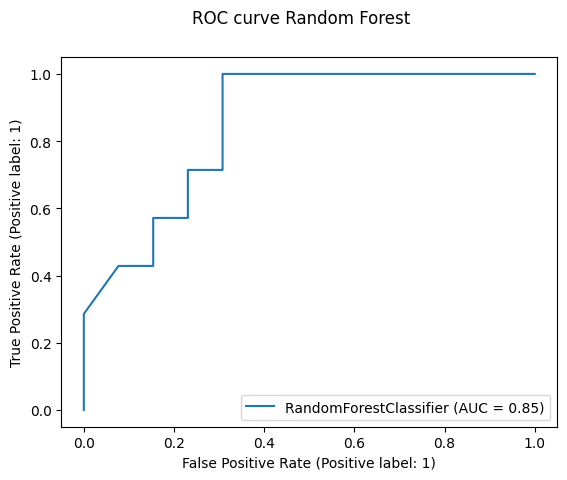

In [ ]:
# plot a ROC curve for an idea of the performance

from sklearn.metrics import RocCurveDisplay

rfc_disp = RocCurveDisplay.from_estimator(rfc, X_test, y_test)
rfc_disp.figure_.suptitle('ROC curve Random Forest')

plt.show

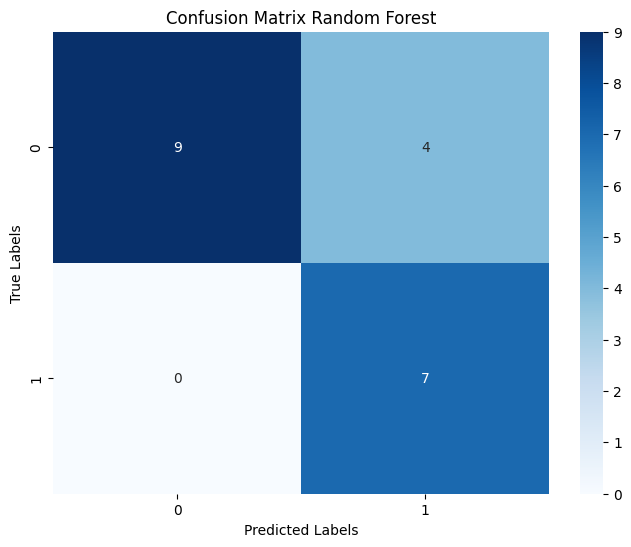

In [ ]:
# get a confusion matrix for the rfc outcomes

from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = rfc.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Random Forest")
plt.show()

In [ ]:
# get the classification performance metrics

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.69      0.82        13
           1       0.64      1.00      0.78         7

    accuracy                           0.80        20
   macro avg       0.82      0.85      0.80        20
weighted avg       0.87      0.80      0.80        20



Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.


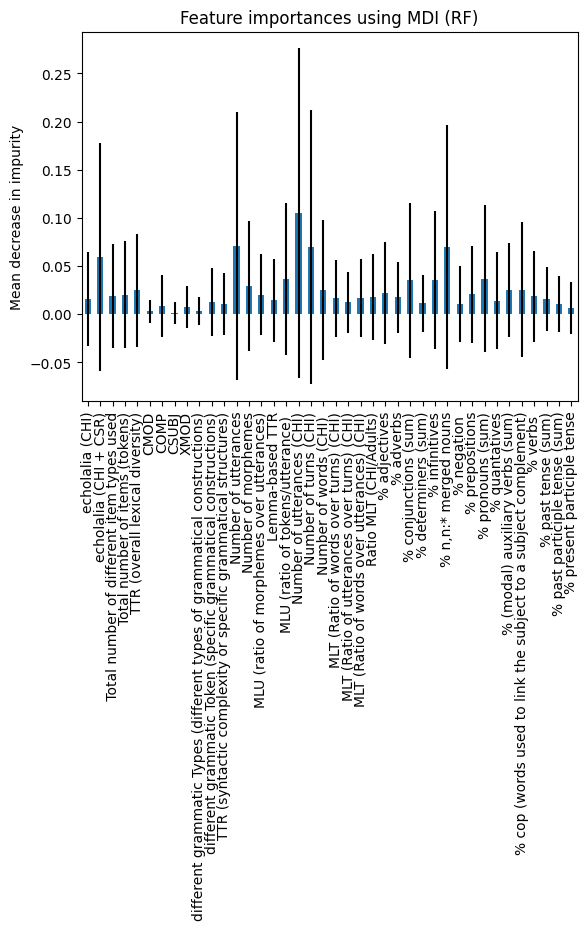

In [ ]:
# get the feeature importance based on mean decrease in impurity (MDI)

feature_names = data_columns

importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI (RF)")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()


In [ ]:
shap.initjs()

In [ ]:
rfc

RandomForestClassifier(random_state=42)

In [ ]:
# analyse the RF classification on the test set with the SHAP tool

explainer = shap.TreeExplainer(rfc)

rfc_shap_values = explainer.shap_values(X_test)
rfc_shap_values

[array([[-1.83520527e-02, -6.09411345e-02, -1.27050698e-02,
         -1.06110511e-03, -1.30561921e-02, -1.49243915e-03,
         -3.43907324e-03,  2.45880796e-04, -3.27040935e-03,
          1.61396338e-03,  7.59887707e-03,  7.65065323e-04,
         -5.73241069e-02, -1.49422780e-02, -5.75333159e-03,
         -4.56232787e-03, -1.85365559e-02, -7.64092072e-02,
         -2.05726827e-02, -1.54192353e-02,  2.84200840e-03,
          3.85283683e-04, -7.73578934e-03,  8.14704397e-04,
          4.69416381e-03, -5.77341953e-03, -1.62990597e-02,
         -3.05963199e-03, -2.58274807e-02, -7.93124449e-02,
         -6.46894596e-03,  2.63274171e-02, -4.13722788e-02,
          4.89440030e-03,  6.31625343e-04, -2.47614414e-02,
          8.36690486e-03, -4.96663263e-03,  1.96254445e-03,
          2.54926529e-03],
        [ 8.34828081e-05, -2.74733612e-02,  1.98942353e-02,
          5.40202224e-03, -3.80676235e-03, -2.25080911e-03,
         -5.47786002e-03,  3.97222107e-04,  7.27527699e-03,
          4.4

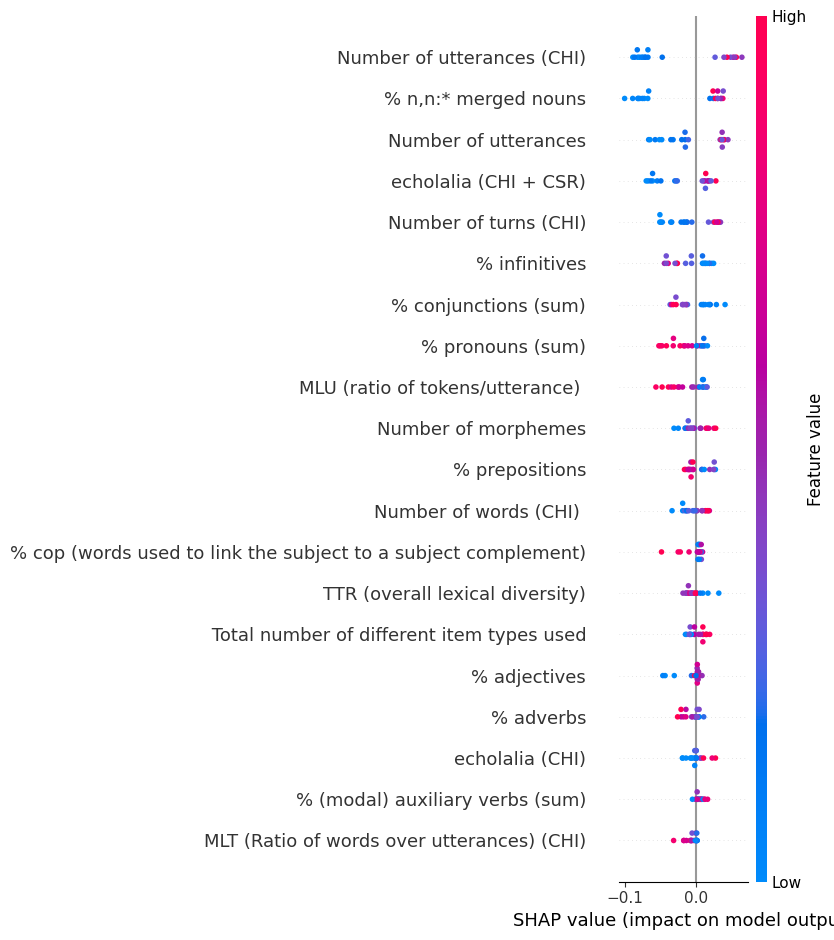

In [ ]:
# Create a summary plot
shap.summary_plot(rfc_shap_values[0], features=X_test)

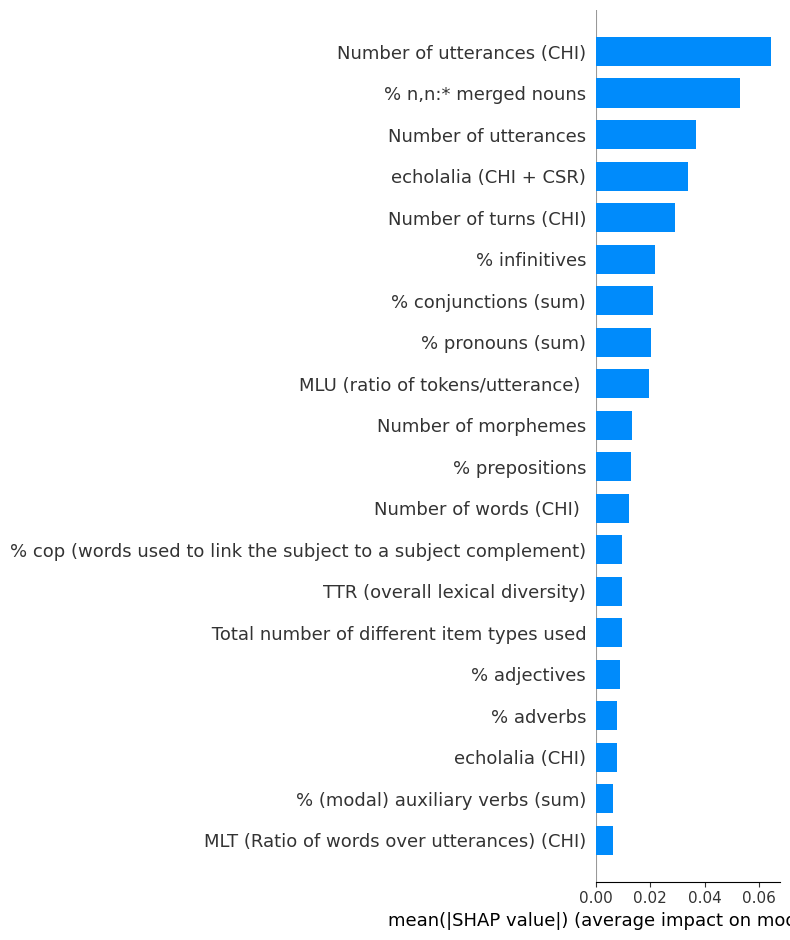

In [ ]:
shap.summary_plot(rfc_shap_values[0], features=X_test, plot_type='bar')